# Урок 3. Связь бизнес-показателей и DS-метрик

План занятия:
1. train/test/val и crossvalidation
2. переход от вероятностей к меткам в задаче бинарной классификации
3. какие бывают DS-метрики, их интерпретация
4. пример из практики
5. бизнес-метрики
6. взаимосвязь DS и бизнес метрик
7. case1 - фильтрация токсичных комментариев
8. case2 - определение ССЗ 

## Введение

**Что бизнес хочет измерить:**
1. Деньги
2. Время
3. Товар
4. и тд



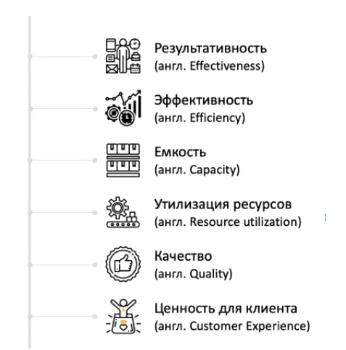

**Что DS хочет измерить:**
1. Процент правильных решений

Нужно как-то эти две вещи связать вместе, т.к. ни одна из функций бизнеса не поможет нам обучать модель.


## Разбивка на train/test/val

<img src='https://drive.google.com/uc?export=view&id=1UUerK2qWzymhSkFreGsoaJjVXRmy99NN'>

*Вопрос*: в чем назначение валидационного набора данных?

## Кроссвалидация (CV)

<img src='https://drive.google.com/uc?export=view&id=1WlWANNMiaVkLuMEjrtlHfEkVsxtO92Zr'>

## Задача бинарной классификации

<table>
<tr>
<td><img src='https://avatars.mds.yandex.net/i?id=f27ad2b3be52d242d844021b565dc5dc-4809805-images-thumbs&n=13&exp=1'></td>
<td><img src='https://avatars.mds.yandex.net/i?id=90f99e8cb895c196d536cb599639cf46-5859283-images-thumbs&n=13&exp=1'></td>
</tr>
</table>

Бинарный классификатор выдает нам "вероятности". Вроде 0.13, 0.87, etc

Однако нам от этого всего мало пользы и требуется в рамках практической задачи получить метки классов.

Например, в задаче оттока нам нужно отобрать подмножество пользователей, которые собираются уйти от нас для дальнейшей работы. 


<img src='https://drive.google.com/uc?export=view&id=15heBe0EsND2Fy8rJ1fK0wXWP5VYPAbu9'>

## Метрики качества бинарной классификации

Пусть классификатор выдаёт метку класса. 

Обозначения: 
* $y_i$ – метка i-го объекта, 
* $a_i$ – ответ на конкретном объекте нашего алгоритма (предсказание), 
* $l$ – число объектов в выборке

Самым простым и распространённым функционалом качества является точность (Accuracy):

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}]$$
$$accuracy(a,x) = \frac{TP+TN}{TP+FP+TN+FN}$$


Т.е это просто доля (процент) объектов, на которых алгоритм выдал правильные ответы. Недостаток такого функционала понятен: он плохо справляется в случае дисбаланса классов, когда представителей одного из классов существенно больше, чем второго. В этом случае, с точки зрения точности, выгодно почти всегда выдавать метку самого популярного класса. Это может не согласовываться с логикой использования решения задачи. Например, в задаче детектирования редкого заболевания алгоритм, который всех относит к классу «здоровые», бесполезен.


Такая метрика нам не подходит (если выборка сбалансирована, то может и подойти), давайте двигаться далее.

Рассмотрим такую штуку, как confusion_matrix

<img src='https://drive.google.com/uc?export=view&id=1D7PNemd9U3RxLLfcdKkM0oly-gx2J8dv' width=600>

Два класса делятся на положительный (обычно метка 1) и отрицательный (обычно метка 0 или –1). 

Объекты, которые алгоритм относит к положительному классу, называются положительными (Positive), те из них, которые на самом деле принадлежат к этому классу – истинно положительными (True Positive), остальные – ложно положительными (False Positive). Аналогичная терминология есть для отрицательного (Negative) класса. 

Дальше используем естественные сокращения:

* TP = True Positive,
* TN = True Negative,
* FP = False Positive,
* FN = False Negative.

<img src='https://drive.google.com/uc?export=view&id=1mt89DjTKsesyuI2RX-5v7ujiS-rJDIUH' width=400>

<b>Пример</b>

Допустим, мы хотим оценить работу системы, которая определяет токсичность комментариев. <br>
- 1000 обычных комментариев<br>
- 900 классификатор определил верно как нормальные<br> (True Negative = 900, False Positive = 100)


- 50 токсичных комментариев<br>
- 25 классификатор также определил верно<br> (True Positive = 25, False Negative = 25).

Тогда accuracy получается таким:

In [ ]:
accuracy = (25 + 900) / (900 + 100 + 25 + 25)
print(accuracy)

0.8809523809523809


А что если у нас тупой классификатор, который отвечает всегда, что комментарий не является токсичным?

In [ ]:
accuracy = (1000) / (900 + 100 + 25 + 25)
print(accuracy)

0.9523809523809523


Видим, что accuracy выше, но нам явно такой классификатор не нужен

### Precison, Recall

Раз уж мы разобрались с тем, что ошибки на разных классах имеют разный вес в рамках конкретной прикладной задачи, давайте введем метрики качества отдельно для классов

Точность (precision) представляет из себя долю истинных срабатываний от общего количества срабатываний. Она показывает, насколько можно доверять алгоритму классификации в случае срабатывания,
$$precision(a, X) = \frac{TP}{TP+FP}.$$

Полнота (recall) считается как доля объектов, истинно относящихся к классу \"+1\", которые алгоритм отнес к этому классу,

$$recall(a, X) = \frac{TP}{TP+FN}$$
    
здесь $TP+FN$ как раз будут вместе составлять весь список объектов класса \"+1\.

<img src='https://drive.google.com/uc?export=view&id=1qQZMWQlTlN3bv1TKaZMRQ9PHYMuTxIk9'>

<img src='https://drive.google.com/uc?export=view&id=1RGBeWoNNWqeaRCR7v6EzZtEhAP6U4V_Z'>


Sensitivity (True Positive Rate) - доля объектов, истинно относящихся к классу "+1", которые алгоритм отнес к этому классу.


Specificity (True Negative Rate) - доля объектов, которые алгоритм отнес к классу "-1", которые на самом деле ялвются этим классом.

Вернемся к примеру с токсичными сообщениями


- 1000 обычных комментариев<br>
- 900 классификатор определил верно как нормальные<br> (True Negative = 900, False Positive = 100)


- 50 токсичных комментариев<br>
- 25 классификатор также определил верно<br> (True Positive = 25, False Negative = 25).

In [ ]:
precision = 25 / (25 + 100)
recall = 25 / (25 + 25)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.2
Recall: 0.5


Что мы можем сделать с прогнозами классификатора, чтобы поменять эти значения?

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'y_true': [0, 1, 1, 0, 1, 0, 0, 0, 0, 1], 
    'y_score': [0.1, 0.98, 0.52, 0.2, 0.41, 0.21, 0.95, 0.14, 0.01, 0.16]
})
df

,y_true,y_score
0,0,0.10
1,1,0.98
2,1,0.52
3,0,0.20
4,1,0.41
5,0,0.21
6,0,0.95
7,0,0.14
8,0,0.01
9,1,0.16


Отсортируем по y_score

In [ ]:
df = df.sort_values(by='y_score', ascending=False)
df

,y_true,y_score
1,1,0.98
6,0,0.95
2,1,0.52
4,1,0.41
5,0,0.21
3,0,0.20
9,1,0.16
7,0,0.14
0,0,0.10
8,0,0.01


У нас всего 10 объектов, из которых 4 относятся к классу "1" и 6 - к классу "0"

Для того, чтобы перейти от "вероятностей" (y_score) к меткам, выберем порог. Начнем с 0.5

In [ ]:
th = 0.5
df['y_score_class'] = df['y_score'].apply(lambda x: 1 if x >= th else 0, 1)
df

,y_true,y_score,y_score_class
1,1,0.98,1
6,0,0.95,1
2,1,0.52,1
4,1,0.41,0
5,0,0.21,0
3,0,0.20,0
9,1,0.16,0
7,0,0.14,0
0,0,0.10,0
8,0,0.01,0


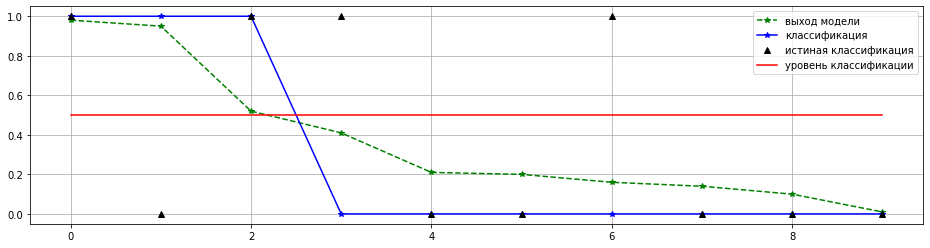

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))

plt.plot(df['y_score'].values , '--*g', label = 'выход модели')
plt.plot(df['y_score_class'].values , '-*b', label = 'классификация')
plt.plot(df['y_true'].values , '^k', label = 'истиная классификация')
plt.grid('on')

plt.plot([0,9],[th,th],'r', label = 'уровень классификации')

plt.legend()
plt.show()

In [ ]:
tp = 2
fp = 1
tn = 5
fn = 2

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))

Precision: 0.6666666666666666
Recall: 0.5


Попробуем другой порог - 0.4

In [ ]:
th = 0.4
df['y_score_class'] = df['y_score'].apply(lambda x: 1 if x >= th else 0, 1)
df

,y_true,y_score,y_score_class
1,1,0.98,1
6,0,0.95,1
2,1,0.52,1
4,1,0.41,1
5,0,0.21,0
3,0,0.20,0
9,1,0.16,0
7,0,0.14,0
0,0,0.10,0
8,0,0.01,0


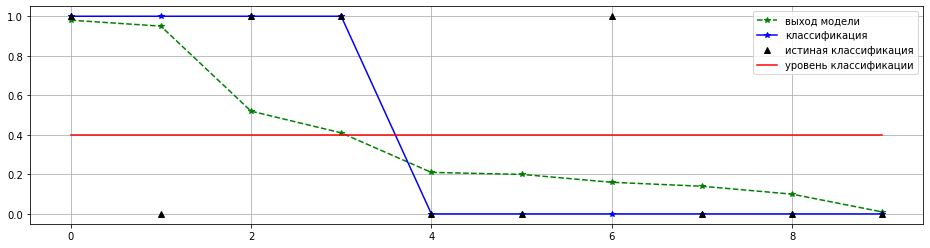

In [ ]:
plt.figure(figsize=(16,4))

plt.plot(df['y_score'].values , '--*g', label = 'выход модели')
plt.plot(df['y_score_class'].values , '-*b', label = 'классификация')
plt.plot(df['y_true'].values , '^k', label = 'истиная классификация')
plt.grid('On')

plt.plot([0,9],[th,th],'r', label = 'уровень классификации')

plt.legend()
plt.show()

In [ ]:
tp = 3
fp = 1
tn = 5
fn = 1

precision = tp / (tp + fp)
recall = tp / (tp + fn)
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))

Precision: 0.75
Recall: 0.75


А что если понизить порог до 0.15

In [ ]:
th = 0.15
df['y_score_class'] = df['y_score'].apply(lambda x: 1 if x >= th else 0, 1)
df

,y_true,y_score,y_score_class
1,1,0.98,1
6,0,0.95,1
2,1,0.52,1
4,1,0.41,1
5,0,0.21,1
3,0,0.20,1
9,1,0.16,1
7,0,0.14,0
0,0,0.10,0
8,0,0.01,0


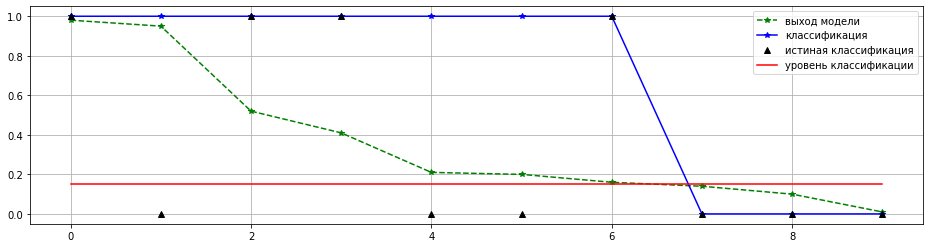

In [ ]:
plt.figure(figsize=(16,4))

plt.plot(df['y_score'].values , '--*g', label = 'выход модели')
plt.plot(df['y_score_class'].values , '-*b', label = 'классификация')
plt.plot(df['y_true'].values , '^k', label = 'истиная классификация')
plt.grid('On')

plt.plot([0,9],[th,th],'r', label = 'уровень классификации')


plt.legend()
plt.show()

In [ ]:
tp = 4
fp = 3
tn = 3
fn = 0

precision = tp / (tp + fp)
recall = tp / (tp + fn)
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))

Precision: 0.5714285714285714
Recall: 1.0


### F-score

Есть различные варианты объединения их в одну метрику, одним из наиболее удобных из них является *F-мера*, которая представляет собой среднее гармоническое между точностью и полнотой,
$$F = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$

В отличие от, например, среднего арифметического, если хотя бы один из аргументов близок к нулю, то и среднее гармоническое будет близко к нулю. По сути, F-мера является сглаженной версией минимума из точности и полноты.

F-score достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

precision, recall, thresholds = precision_recall_curve(df['y_true'], df['y_score'])
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Best Threshold=0.41, F-Score=0.750, Precision=0.750, Recall=0.750


### Метрики качества, для которых не нужно подбирать порог

#### ROC AUC

Есть способы оценки модели в целом, не привязываясь к конкретному порогу. Первый из них основанна использовании _ROC-кривой_. Такая кривая строится в следующих координатах:
по оси $x$ откладывается доля ложных срабатываний (False Positive Rate) - отношение числа ложных срабатываний к общему размеру отрицательного класса:
$$FPR = \frac{FP}{FP+TN}$$
по оси $y$ откладывается доля верных срабатываний (True Positive Rate) - отношение числа верных срабатываний к размеру положительного класса:

$$TPR = \frac{TP}{TP+FN},$$

то есть TPR по сути представляет из себя полноту, о которой мы говорили ранее.
Точка на графике будет соответствовать конкретному классификатору с некоторым значением порога.


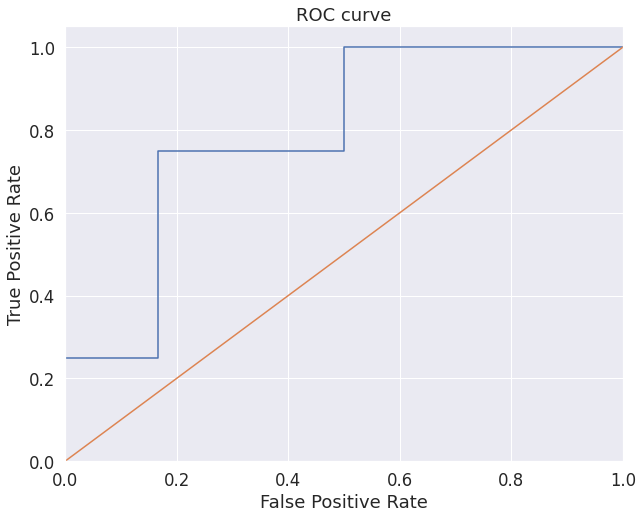

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(df['y_true'], df['y_score'], pos_label=1)

plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [ ]:
df

,y_true,y_score,y_score_class
1,1,0.98,1
6,0,0.95,1
2,1,0.52,1
4,1,0.41,1
5,0,0.21,1
3,0,0.20,1
9,1,0.16,1
7,0,0.14,0
0,0,0.10,0
8,0,0.01,0


In [ ]:
roc_auc_score(df['y_true'], df['y_score'])

0.7916666666666667

Выглядит она не очень, но это только из-за того, что у нас мало данных

In [ ]:
df[['y_true', 'y_score']]

,y_true,y_score
1,1,0.98
6,0,0.95
2,1,0.52
4,1,0.41
5,0,0.21
3,0,0.20
9,1,0.16
7,0,0.14
0,0,0.10
8,0,0.01


## Кейс 1 - фильтрация токсичных комментариев

Есть сервис, где люди могут оставлять комментарии

При этом часть комментариев является токсичной, т.е содержит расистские, сексистские и тому подобные вещи.

Над проверкой сообщений работают модераторы и мы хотим уменьшить на них нагрузку с помощью ML.


1. Если владелец данного ресурса не будет избавляться от таких комментариев, то надзор выставляет штраф за нарушение правил 
2. Если модератор банит всех подряд за такие сообщения, то пользователи, которых часто банят, уйдут с нашего ресурса и владелец потеряет рекламные деньги


Так что две стороны у этой задачи




Вспомним первое занятие и сформулируем гипотезу

Гипотеза.
Мы предполагаем, что автоматическая фильтрация токсичных комментариев снизит нагрузку на модераторов и повысит их пропускную способность на 10%, при этом доля FP не превысит 10%

<img src='https://drive.google.com/uc?export=view&id=1OpoIwLA0-vpWw_D2X9_oyFt6qcXgh8Rw' width=600>

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1oPtTtVbkSEdiNwjcSHeEkv_C9g0yfLVO' -O train.csv

--2022-05-20 16:40:32--  https://drive.google.com/uc?export=download&id=1oPtTtVbkSEdiNwjcSHeEkv_C9g0yfLVO
Resolving drive.google.com (drive.google.com)... 74.125.135.101, 74.125.135.139, 74.125.135.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.135.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/egc73j61i7mi040cciprrc82a34la77m/1653064800000/14904333240138417226/*/1oPtTtVbkSEdiNwjcSHeEkv_C9g0yfLVO?e=download [following]
--2022-05-20 16:40:37--  https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/egc73j61i7mi040cciprrc82a34la77m/1653064800000/14904333240138417226/*/1oPtTtVbkSEdiNwjcSHeEkv_C9g0yfLVO?e=download
Resolving doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)... 108.177.98.132, 2607:f8b0:400e:c06::84
Connecting to doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.sparse import hstack
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

train = pd.read_csv('train.csv').fillna(' ').sample(frac=1)
train.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
94947,fdd415800809096d,( Unfortunately the South Park ended before Kr...,0,0,0,0,0,0
102301,236bbbfa92dd160a,"""\n\n Any Details? \n\nAny details you can giv...",0,0,0,0,0,0
157809,e3a4ee544264059e,"""\nI could just give you an email address that...",0,0,0,0,0,0


Здесь много разных вариантов, но мы сведем все к бинарному классу - toxic/nontoxic

In [ ]:
train['y'] = train[class_names].max(axis=1).values
train['y'].value_counts()

0    143346
1     16225
Name: y, dtype: int64

Сделаем тренировочную и тестовую выборки

In [ ]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns='y'), 
                                                    train['y'], random_state=0)

Посмотрим на распределение классов в выборках

In [ ]:
y_train.value_counts(normalize=True)

0    0.897893
1    0.102107
Name: y, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.899606
1    0.100394
Name: y, dtype: float64

Построим простое векторное представление текстов и обучим логистическую регрессию

In [ ]:
%%time
# соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]

classifier = Pipeline([('comment_text_selector', FeatureSelector(column='comment_text')), 
                       ('comment_text_tfidf', TfidfVectorizer(strip_accents='unicode',
                                                              analyzer='word',
                                                              token_pattern=r'\w{1,}',
                                                              stop_words='english',
                                                              max_features=10000)), 
                       ('clf', LogisticRegression())])

# запустим кросс-валидацию
cv_scores = cross_val_score(classifier, X_train, y_train, cv=3, scoring='roc_auc')
cv_score = np.mean(cv_scores)
print(f'CV score is {cv_score}')

# обучим пайплайн на всем тренировочном датасете
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


CV score is 0.9654651268470894
CPU times: user 47.1 s, sys: 8.31 s, total: 55.4 s
Wall time: 46 s


In [ ]:
cv_scores

array([0.96466276, 0.96593702, 0.9657956 ])

Воспользуемся доступным в sklearn инструментарием, чтобы получить оптимальный порог

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix

b = 1

precision, recall, thresholds = precision_recall_curve(y_test.values, y_score)
fscore = (1 + b**2) * (precision * recall) / (b**2 * precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Best Threshold=0.25602506872326136, F-Score=0.779, Precision=0.812, Recall=0.749


Нарисуем roc кривую

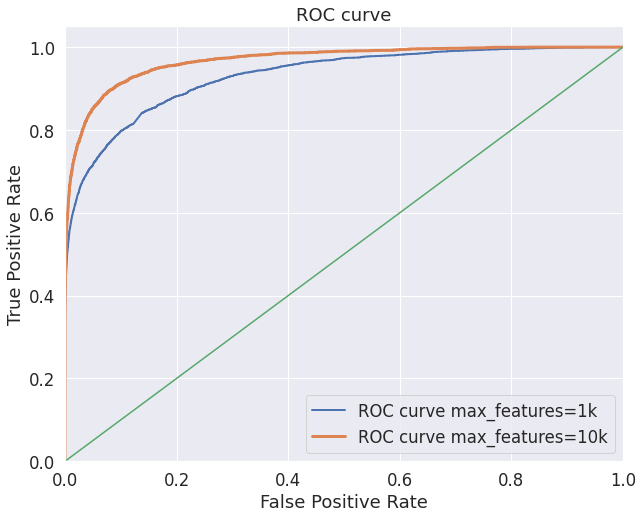

In [ ]:
import seaborn as sns
import itertools
import matplotlib.pyplot as plt


sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))

# fpr_1k, tpr_1k, thresholds_ = roc_curve(y_test, y_score, pos_label=1)
fpr_10k, tpr_10k, thresholds_ = roc_curve(y_test, y_score, pos_label=1)
lw = 2
plt.plot(fpr_1k, tpr_1k, lw=lw, label='ROC curve max_features=1k')
plt.plot(fpr_10k, tpr_10k, lw=lw+1, label='ROC curve max_features=10k')

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.legend()
plt.show()

Как это интерпетировать? Давайте построим матрицу ошибок, чтобы стало понятнее

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[35192   696]
 [ 1008  2997]]


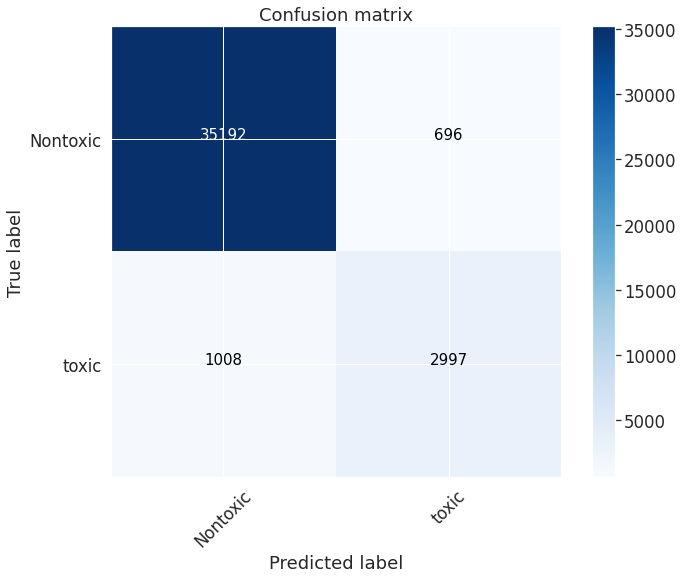

In [ ]:
# мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_score > thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Nontoxic', 'toxic'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

Посчитаем FPR, TPR

In [ ]:
TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]

Посчитаем нужные нам метрики

In [ ]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
TNR = TN / (FP + TN)
TPR, FPR, TNR

(0.748314606741573, 0.01939366919304503, 0.9806063308069549)

Глобальные выводы:

1. TNR = 0.97 -> модель находит в 3% нормальных комментариев видит токсичные комментарии.
2. TPR = 0.71 -> модель находит 71% токсичных комментариев из всех токсичных
3. FPR = 0.022 -> модель допускает только 2.2% неверных срабатываний на нормальных комментариях



Пусть:

- пропущенный токсичный комментарий стоит 100р (FN)
- отброшеный пользователь обойдется в 10р (FP)

Определим где больше потерь:


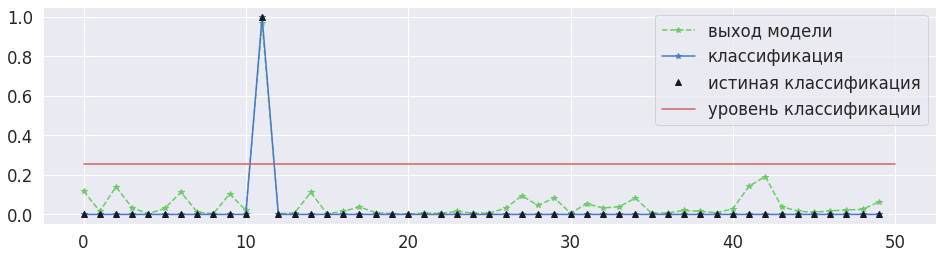

In [ ]:
plt.figure(figsize=(16,4))

n = 50
plt.plot(y_score[:n] , '--*g', label = 'выход модели')
plt.plot(y_score[:n] > thresholds[ix], '-*b', label = 'классификация')
plt.plot(y_test.values[:n], '^k', label = 'истиная классификация')
plt.grid('on')

plt.plot([0,n], [thresholds[ix],thresholds[ix]],'r', label = 'уровень классификации')


plt.legend()
plt.show()

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_score > thresholds[ix])
FN = cnf_matrix[1][0]
FP = cnf_matrix[0][1]

pay_toxic = FN * 100 + FP * 10
print('порог: ', thresholds[ix], '  потери:', pay_toxic)

порог:  0.25602506872326136   потери: 107760


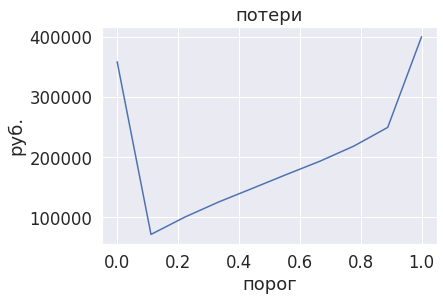

In [ ]:
pay_toxic_th = []
trh_level = np.linspace(0, 1, 10).tolist()

for trh in trh_level:
    cnf_matrix = confusion_matrix(y_test, y_score > trh)
    FN = cnf_matrix[1][0]
    FP = cnf_matrix[0][1]
    pay_toxic_th.append(FN * 100 + FP * 10)
    
plt.plot(trh_level, pay_toxic_th)
plt.ylabel('руб.')
plt.xlabel('порог')
plt.title('потери')
plt.show()

Confusion matrix, without normalization
[[32814  3074]
 [  405  3600]]


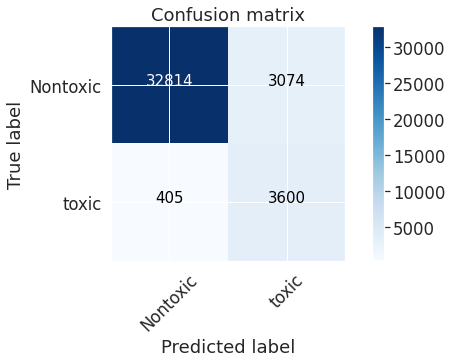

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_score > 0.1)
plt.figure(figsize=(8, 5))
plot_confusion_matrix(cnf_matrix, classes=['Nontoxic', 'toxic'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_score > 0.1)
FN = cnf_matrix[1][0]
FP = cnf_matrix[0][1]


pay_toxic = FN * 100 + FP * 10
print('порог: ', 0.1, '  потери:', pay_toxic)

порог:  0.1   потери: 71240


## Кейс 2 - определение ССЗ

ссылка на соревнование - https://mlbootcamp.ru/ru/round/12/sandbox/

В идеале бы конечно всех людей отправить на обследования, но количество тестов ограничено, бюджет ограничен, поэтому нужно отбирать только тех людей, у которых повышен риск сердечно-сосудистых заболеваний.

В рамках конкурса вам нужно предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован из 100.000 реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

 

Объективные признаки:

 - Возраст
 - Рост
 - Вес
 - Пол
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее
 - Холестерин
 - Глюкоза
 

Субъективные признаки:

 - Курение
 - Употребление Алкоголя
 - Физическая активность
 

Возраст дан в днях. Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

Таргет - наличие сердечно-сосудистых заболеваний (ССЗ)

Ссылка на google drive: https://drive.google.com/file/d/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G' -O train_case2.csv

--2022-05-20 16:44:05--  https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G
Resolving drive.google.com (drive.google.com)... 74.125.197.101, 74.125.197.139, 74.125.197.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bjtok1iebi2gvjkn87ecv0csaem9842d/1653065025000/14904333240138417226/*/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G?e=download [following]
--2022-05-20 16:44:05--  https://doc-00-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bjtok1iebi2gvjkn87ecv0csaem9842d/1653065025000/14904333240138417226/*/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G?e=download
Resolving doc-00-c0-docs.googleusercontent.com (doc-00-c0-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c06::84
Connecting to doc-00-c0-docs.googleusercontent.com (doc-00-c0-docs.

In [ ]:
df = pd.read_csv('train_case2.csv', ';')
df.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


Разделим наши данные на тренировочную и тестовую выборки

In [ ]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='cardio'), 
                                                    df['cardio'], random_state=0)

К полям:
- gender, cholesterol применим OHE-кодирование
- age, height, weight, ap_hi, ap_lo - standardScaler
- gluc, smoke, alco, active - оставим пока как есть

In [ ]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]


from sklearn.preprocessing import StandardScaler


continuos_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
cat_cols = ['gender', 'cholesterol']
base_cols = ['gluc', 'smoke', 'alco', 'active']

continuos_transformers = []
cat_transformers = []
base_transformers = []

for cont_col in continuos_cols:
    transfomer =  Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('standard', StandardScaler())
            ])
    continuos_transformers.append((cont_col, transfomer))
    
for cat_col in cat_cols:
    cat_transformer = Pipeline([
                ('selector', ColumnSelector(key=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    cat_transformers.append((cat_col, cat_transformer))
    
for base_col in base_cols:
    base_transformer = Pipeline([
                ('selector', NumberSelector(key=base_col))
            ])
    base_transformers.append((base_col, base_transformer))

Теперь объединим все наши трансформеры с помощью FeatureUnion

In [ ]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion(continuos_transformers+cat_transformers+base_transformers)
feature_processing = Pipeline([('feats', feats)])

feature_processing.fit_transform(X_train)

array([[-1.73391771,  0.6873301 ,  0.74843904, ...,  1.        ,
         0.        ,  1.        ],
       [-1.67343538,  0.07758923, -0.29640123, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.13738132,  1.17512278, -0.15708919, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.17775864,  1.17512278, -0.15708919, ...,  0.        ,
         0.        ,  1.        ],
       [-0.47190715, -1.38578883,  0.74843904, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.38174619,  0.56538192, -0.08743318, ...,  0.        ,
         0.        ,  1.        ]])

Добавим классификатор и запустим кросс-валидацию

In [ ]:
classifier = Pipeline([
    ('features', feats),
    ('classifier', LogisticRegression(random_state=42)),
])


# запустим кросс-валидацию
cv_scores = cross_val_score(classifier, X_train, y_train, cv=7, scoring='roc_auc')
cv_score = np.mean(cv_scores)
cv_score_std = np.std(cv_scores)
print(f'CV score is {cv_score}+-{cv_score_std}')

# обучим пайплайн на всем тренировочном датасете
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)[:, 1]

CV score is 0.7864573689384385+-0.004422021036885763


Посчитаем precision/recall/f_score

In [ ]:
b = 1
precision, recall, thresholds = precision_recall_curve(y_test.values, y_score)
fscore = (1 +b**2) * (precision * recall) / (b**2 * precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Best Threshold=0.3869370891147379, F-Score=0.730, Precision=0.647, Recall=0.838


Нарисуем roc auc кривую.

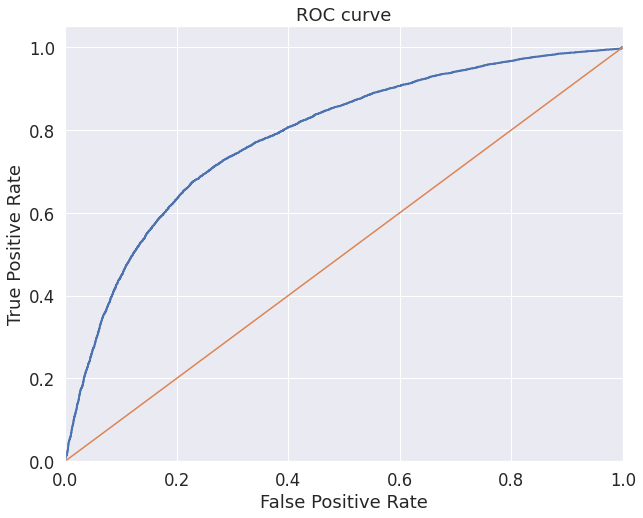

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds_ = roc_curve(y_test, y_score, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

print(f"roc auc score: {roc_auc_score(y_train, classifier.predict_proba(X_train)[:, 1])}")

print(f"roc auc score: {roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])}")

roc auc score: 0.7870081561637485
roc auc score: 0.7840347790421852


Посмотрим на матрицу ошибок

Confusion matrix, without normalization
[[4861 3959]
 [1411 7269]]


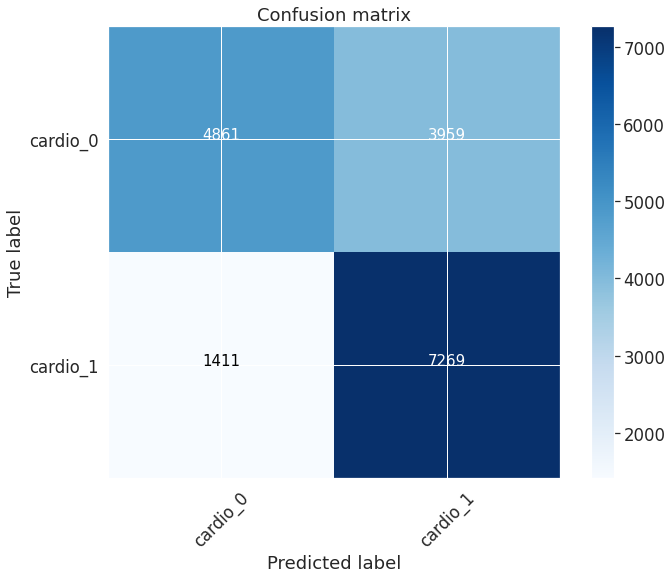

In [ ]:
# мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_score > thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['cardio_0', 'cardio_1'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

Посчитаем FPR, TPR

In [ ]:
TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]

TPR = TP / (TP+FN)
FPR = FP / (FP+TN)
TNR = TN / (FP+TN)
TPR, FPR, TNR

(0.837442396313364, 0.44886621315192743, 0.5511337868480726)

False Positive Rate довольно высокий ~ 0.45.

Это означает, что 45 процентов здоровых пациентов получат метку 1.


Пусть:

- стоимость лечения 15000р, если сделали тест и начали лечить вовремя
- стоимость лечения 20000р, если упустили и начали лечить когда уже проявились все симптомы
- стоимость теста 1400р



- лишних тестов сделали FP = cnf_matrix[0][1]
- пропустили больных FN = cnf_matrix[1][0]
- правильных тестов сделали TP = cnf_matrix[1][1]

Оценим расходы, если не делать тест и ждать симптомов:


In [ ]:
rubl_test = 1400
rubl_early_treatment = 15000
rubl_late_treatment = 20000

In [ ]:
rubl_1 = (FN + TP) * rubl_late_treatment
print('расходы, если не делать тест и ждать симптомов:', rubl_1)

расходы, если не делать тест и ждать симптомов: 173600000




Расходы, если сделать тест всем:


In [ ]:
rubl_test_all = np.sum(cnf_matrix) * rubl_test + (FN + TP) * rubl_early_treatment
print('расходы, если делать тест всем и лечить группу большых:', rubl_test_all)

расходы, если делать тест всем и лечить группу большых: 154700000




Расходы если использовать ML:


In [ ]:
rubl_ML = (FP + TP) * rubl_test + FN * rubl_late_treatment + TP * rubl_early_treatment
print('расходы, если использовать МЛ:', rubl_ML)

расходы, если использовать МЛ: 152974200




Оценим разницу:


In [ ]:
print('Расходы "решение не делать тесты - расходы с МL:"', rubl_1 - rubl_ML)
print('Расходы "решение не делать тесты - расходы сделать тесты всем":', rubl_1 - rubl_test_all)
print('Расходы "сделать тесты всем - решение делать тесты ML":', rubl_test_all - rubl_ML)

Расходы "решение не делать тесты - расходы с МL:" 20625800
Расходы "решение не делать тесты - расходы сделать тесты всем": 18900000
Расходы "сделать тесты всем - решение делать тесты ML": 1725800




Метрика по деньгам : получить меньше расходов чем при полном тесте

In [ ]:
def business_threshold_calibrate(y_test, y_score, thresholds,
                                 rubl_test=100, rubl_early_treatment=100, rubl_late_treatment=1000):
    business_threshold = 0
    r_test_all_r_ML_ = 0

    rubl_ML_ = 1_000_000_000 

    rs = []
    n = 20
    for opt_buisness_tr in np.linspace(0, 1, n).tolist():
        # подберем порог для улучшения бизнесс показателя

        cnf_matrix = confusion_matrix(y_test, y_score > (opt_buisness_tr))
        TN = cnf_matrix[0][0]
        FN = cnf_matrix[1][0]
        TP = cnf_matrix[1][1]
        FP = cnf_matrix[0][1]

        rubl_1 = (TP + FN) * rubl_late_treatment
        rubl_test_all = np.sum(cnf_matrix) * rubl_test + (FN + TP) * rubl_early_treatment
        rubl_ML = (TP + FP) * rubl_test + FN * rubl_late_treatment + TP * rubl_early_treatment
        
        r_test_all_r_ML = rubl_test_all - rubl_ML 
        
        if rubl_ML < rubl_ML_:            
            business_threshold = opt_buisness_tr
            
            rubl_ML_ = rubl_ML
            
        rs.append(rubl_ML)   
            
    
    print('расходы, если не делать тест и ждать симптомов:', rubl_1)
    print('расходы, если делать тест всем и лечить группу больных:', rubl_test_all)
    print('расходы, если использовать МЛ:', rubl_ML_)

    print('Расходы "решение не делать тесты - расходы с МL:"', rubl_1 - rubl_ML_)
    print('Расходы "решение не делать тесты - расходы сделать тесты всем":', rubl_1 - rubl_test_all)
    print('Расходы "сделать тесты всем - решение делать тесты ML":', rubl_test_all - rubl_ML_)
    
    plt.title('Потери при МЛ решении')
    plt.xlabel('Отсечка')
    plt.ylabel('Потери')
    plt.plot(np.linspace(0,1,n), rs)
    plt.show()
    return business_threshold

расходы, если не делать тест и ждать симптомов: 173600000
расходы, если делать тест всем и лечить группу больных: 154700000
расходы, если использовать МЛ: 152712400
Расходы "решение не делать тесты - расходы с МL:" 20887600
Расходы "решение не делать тесты - расходы сделать тесты всем": 18900000
Расходы "сделать тесты всем - решение делать тесты ML": 1987600


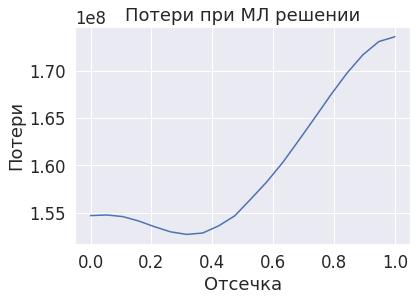

уровень порога по бизнес метрике 0.3157894736842105
уровень порога по f1 метрике 0.3869370891147379


In [ ]:
busines_tr = business_threshold_calibrate(y_test, y_score, 
                                          thresholds[ix],
                                          rubl_test=1400, 
                                          rubl_early_treatment=15000, 
                                          rubl_late_treatment=20000)

print('уровень порога по бизнес метрике', busines_tr)
print('уровень порога по f1 метрике', thresholds[ix])

## Дополнительные ссылки

1. https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
2. https://en.wikipedia.org/wiki/Receiver_operating_characteristic
3. Метрики для классификации (видео) - https://youtube.com/playlist?list=PLkJJmZ1EJno6CLyvD4DHc32Fed6cPBHje
4. Метрики для регрессии (видео) - https://youtu.be/vh2smjQyhp8
5. ROC-AUC (видео) - https://youtu.be/v6PPG8J_Egs

## Домашнее задание

1. Обучить несколько разных моделей на наборе данных ССЗ (train_case2.csv): логрег, бустинг, лес и т.д - на ваш выбор 2-3 варианта
2. Вывести сравнение полученных моделей по основным метрикам классификации: pr/rec/auc/f_score (можно в виде таблицы, где строки - модели, а столбцы - метрики)
3. Вывести сравнение полученных моделей по метрикам бизнеса по показателям с урока
    - стоимость лечения 15000р, если сделали тест и начали лечить вовремя
    - стоимость лечения 20000р, если упустили и начали лечить когда уже проявились все симптомы
    - стоимость теста 1400р
4. Сделать выводы о том, какая модель справилась с задачей лучше других
5. *Найти порог классификации по деньгам для лучшей модели
    - Стоимость лечения 15000р, если сделали тест и начали лечить вовремя
    - Стоимость лечения 20000р, если упустили и начали лечить когда уже проявились все симптомы
    - Стоимость теста 1400р